# Sales Analysis

In [1]:
import pandas as pd
import numpy as np

### Preproccesing

In [2]:
df=pd.read_csv(r"C:\Users\bmsha\Documents\CodSoft\salesprediction\dataset\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


> <b> most of money spent for ad is in tv

### EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

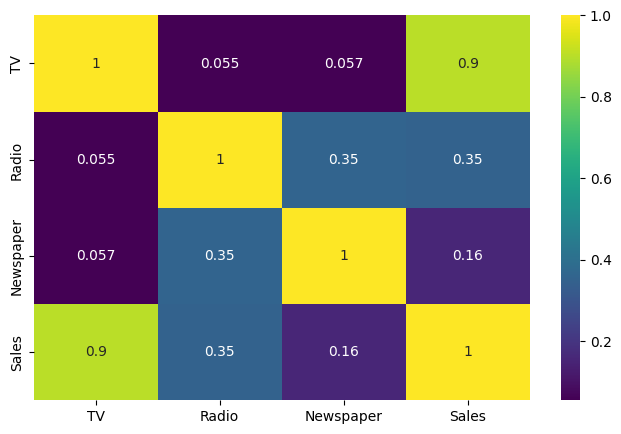

In [15]:
plt.figure(figsize=(8,5),)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

><b> TV,advertising have highest impact on sales ,followed by radio and news paper

### Evaluation and model building

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error

In [17]:
x=df.drop(columns='Sales')

In [18]:
y=df['Sales']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [22]:
xtrain.shape

(160, 3)

In [23]:
xtest.shape

(40, 3)

In [24]:
model=LinearRegression()

In [25]:
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [27]:
print("RMSE:",np.sqrt(mean_squared_error(ytest,ypred)))
print("MAE:",mean_absolute_error(ytest,ypred))
print("R2Score",r2_score(ytest,ypred))

RMSE: 1.7052146229349223
MAE: 1.2748262109549338
R2Score 0.9059011844150826


## Resiidual Plot

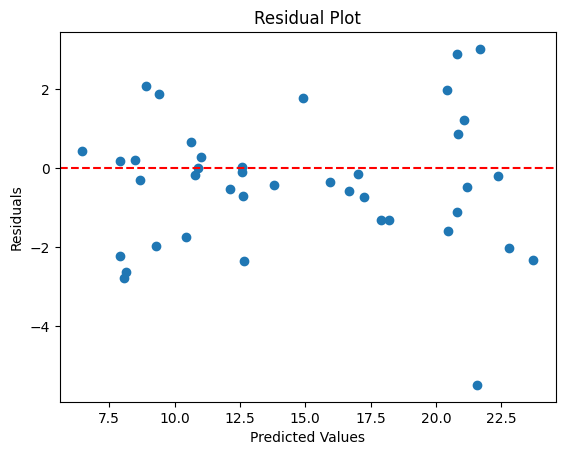

In [57]:
residuals = ytest - ypred
plt.scatter(ypred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# RandomForest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor


In [50]:
reggresor=RandomForestRegressor(n_estimators=10000,random_state=42)


In [51]:
reggresor.fit(xtrain,ytrain)
ypredr=reggresor.predict(xtest)

In [52]:
print("MAE:",mean_absolute_error(ypredr,ytest))
print("RMSE:",root_mean_squared_error(ypredr,ytest))
print("r2score:",r2_score(ypredr,ytest))

MAE: 0.9119777500001444
RMSE: 1.194925138660348
r2score: 0.9520647902538449


### Compared to my previous results, my model has improved. The errors are smaller, and it explains more variance. These values are very close to ideal, which means my model is performing very well

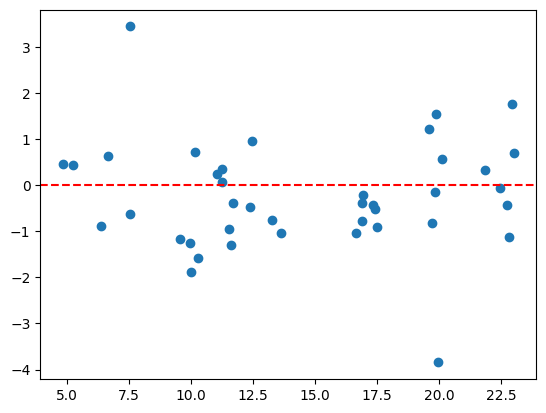

In [58]:
res=ytest-ypredr
plt.scatter(ypredr,res)
plt.axhline(y=0,color='red',linestyle='--')

> residual plot

In [60]:
import joblib

In [61]:
joblib.dump(model,r"C:\Users\bmsha\Documents\CodSoft\salesprediction\models")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\bmsha\\Documents\\CodSoft\\salesprediction\\models'